## K-Means Clustering

### Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\Iris.csv")

In [20]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### We will consider only two columns as input in order to catergorise it using K-Means

In [21]:
X=df["PetalLengthCm"]
Y=df["SepalWidthCm"]

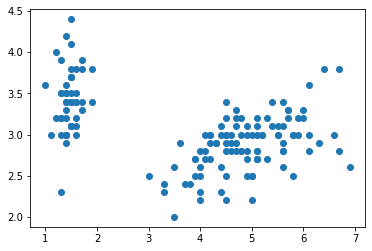

In [22]:
plt.scatter(X,Y)

#### By visualizing it we can decide that it will have two classes to classify the data properly

###  K-Means Clustering Algorithm from Scratch

#### Initialize the initial centroids values randomly.

In [107]:
x1=1.5 
y1=3.5  # (x1,y1) value of 1 centroid
x2=4 
y2=2.7   # (x2,y2) value of 2nd centroid
g1_x=[]       
g1_y=[]
g2_x=[]
g2_y=[]
x2_n=0
x1_n=0
y2_n=0
y1_n=0

#### update value of centroids until we get the same value of centroids as of the previous iteration.

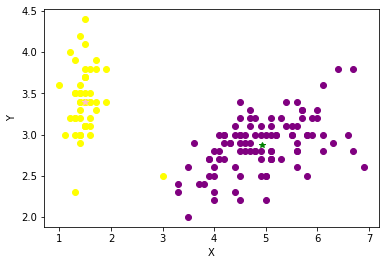

In [110]:
while(x1!=x1_n and y1!=y1_n and x2!=x2_n and y2!=y2_n ):   
    x2_n=x2
    x1_n=x1
    y2_n=y2
    y1_n=y1
    g1_x=[]
    g1_y=[]
    g2_x=[]
    g2_y=[]
    
    for i in range(len(X)):
        d1=np.sqrt((X[i]-x1)**2+(Y[i]-y1)**2)    #calculate distance of each data point from each centroid
        d2=np.sqrt((X[i]-x2)**2+(Y[i]-y2)**2)
        if d2>=d1:                               #Data-point assigned to the class of centroid , whose distance is closer  
            g1_x.append(X[i])
            g1_y.append(Y[i])
        else:
            g2_x.append(X[i])
            g2_y.append(Y[i])
    x1=np.sum(g1_x)/len(g1_x)                   #Update the centroids by considering mean of values of data-points w.r.t to   
    x2=np.sum(g2_x)/len(g2_x)                   # each category.
    y1=np.sum(g1_y)/len(g1_y)
    y2=np.sum(g2_y)/len(g2_y)
    
plt.scatter(g1_x,g1_y,color="yellow")            #Plot the categorized data points
plt.scatter(g2_x,g2_y,color="purple")
plt.plot(x1,y1,color="pink",marker="*")          #Plot final value of centroids
plt.plot(x2,y2,color="green",marker="*")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()     


#### Value of final centroids by implementing algorithm from scratch

In [112]:
print("Updated values of centroids after enough iterations")
print(x2,y2)
print(x1,y1)

Updated values of centroids after enough iterations
4.9252525252525245 2.8757575757575755
1.4941176470588236 3.4


In [89]:
Z = np.array(list(zip(X, Y)))

### K-Means Algorithm Implementation using Sklearn

In [113]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans = kmeans.fit(Z)

centroids = kmeans.cluster_centers_


print("Centroid value")
print(centroids) # From slearn


Centroid value
[[4.92525253 2.87575758]
 [1.49411765 3.4       ]]


##### Results from both the methods are almost same

### Visualization of Sklearn Results

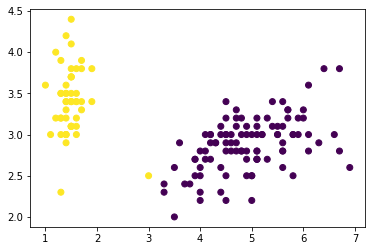

In [114]:
plt.scatter(df['PetalLengthCm'], df['SepalWidthCm'], c=kmeans.labels_) 